In [3]:

# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
dataset = pd.read_csv('avocado.csv')
dataset.head()

,num,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [25]:
# class distribution
print(dataset.groupby('type').size())
X12 = dataset.drop(['Date','region','num'], axis=1)
X12.head()

type
conventional    9126
organic         9123
dtype: int64


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


In [30]:
import pandas as pd 

type = {'conventional': 1,'organic': 0} 
  
X12.type = [type[item] for item in X12.type] 
print(X12)

       AveragePrice  Total Volume       4046       4225     4770  Total Bags  \
0              1.33      64236.62    1036.74   54454.85    48.16     8696.87   
1              1.35      54876.98     674.28   44638.81    58.33     9505.56   
2              0.93     118220.22     794.70  109149.67   130.50     8145.35   
3              1.08      78992.15    1132.00   71976.41    72.58     5811.16   
4              1.28      51039.60     941.48   43838.39    75.78     6183.95   
5              1.26      55979.78    1184.27   48067.99    43.61     6683.91   
6              0.99      83453.76    1368.92   73672.72    93.26     8318.86   
7              0.98     109428.33     703.75  101815.36    80.00     6829.22   
8              1.02      99811.42    1022.15   87315.57    85.34    11388.36   
9              1.07      74338.76     842.40   64757.44   113.00     8625.92   
10             1.12      84843.44     924.86   75595.85   117.07     8205.66   
11             1.28      64489.17    158

In [31]:
# Split-out validation dataset
array = X12.values
X = array[:,1:14]
Y = array[:,10]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [32]:

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'


In [38]:
# Spot Check Algorithms
# create and configure model

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

model = LogisticRegression(solver='liblinear')
# create and configure model
model = LogisticRegression(solver='lbfgs')
# create and configure model
model = LogisticRegression(solver='lbfgs', multi_class='ovr')
# create and configure model
model = LogisticRegression(solver='lbfgs', multi_class='auto')
# create and configure model
model = SVC(gamma='auto')
# create and configure model
model = SVC(gamma='scale')

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.459484 (0.016530)


C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\B

LDA: 0.375779 (0.011970)
KNN: 0.654086 (0.010957)
CART: 1.000000 (0.000000)
NB: 0.325846 (0.013900)


KeyboardInterrupt: 

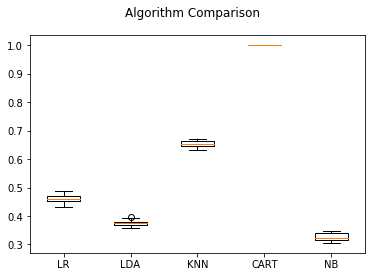

In [37]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [39]:

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(predictions)

0.6665753424657535
[[930 128  60   1]
 [233 641 213  19]
 [101 222 785  42]
 [ 25  55 118  77]]
              precision    recall  f1-score   support

      2015.0       0.72      0.83      0.77      1119
      2016.0       0.61      0.58      0.60      1106
      2017.0       0.67      0.68      0.67      1150
      2018.0       0.55      0.28      0.37       275

   micro avg       0.67      0.67      0.67      3650
   macro avg       0.64      0.59      0.60      3650
weighted avg       0.66      0.67      0.66      3650

[2015. 2017. 2015. ... 2018. 2016. 2015.]
